# Bank Loan Approval

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [116]:
df = pd.read_csv('Banking.csv')

In [117]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Data Preproccessing

In [118]:
df.shape

(41188, 21)

In [119]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [121]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [122]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [123]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [124]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [125]:
df['y'] = df['y'].replace({'yes':1,'no':0})

In [126]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Data Analysis and Visualization

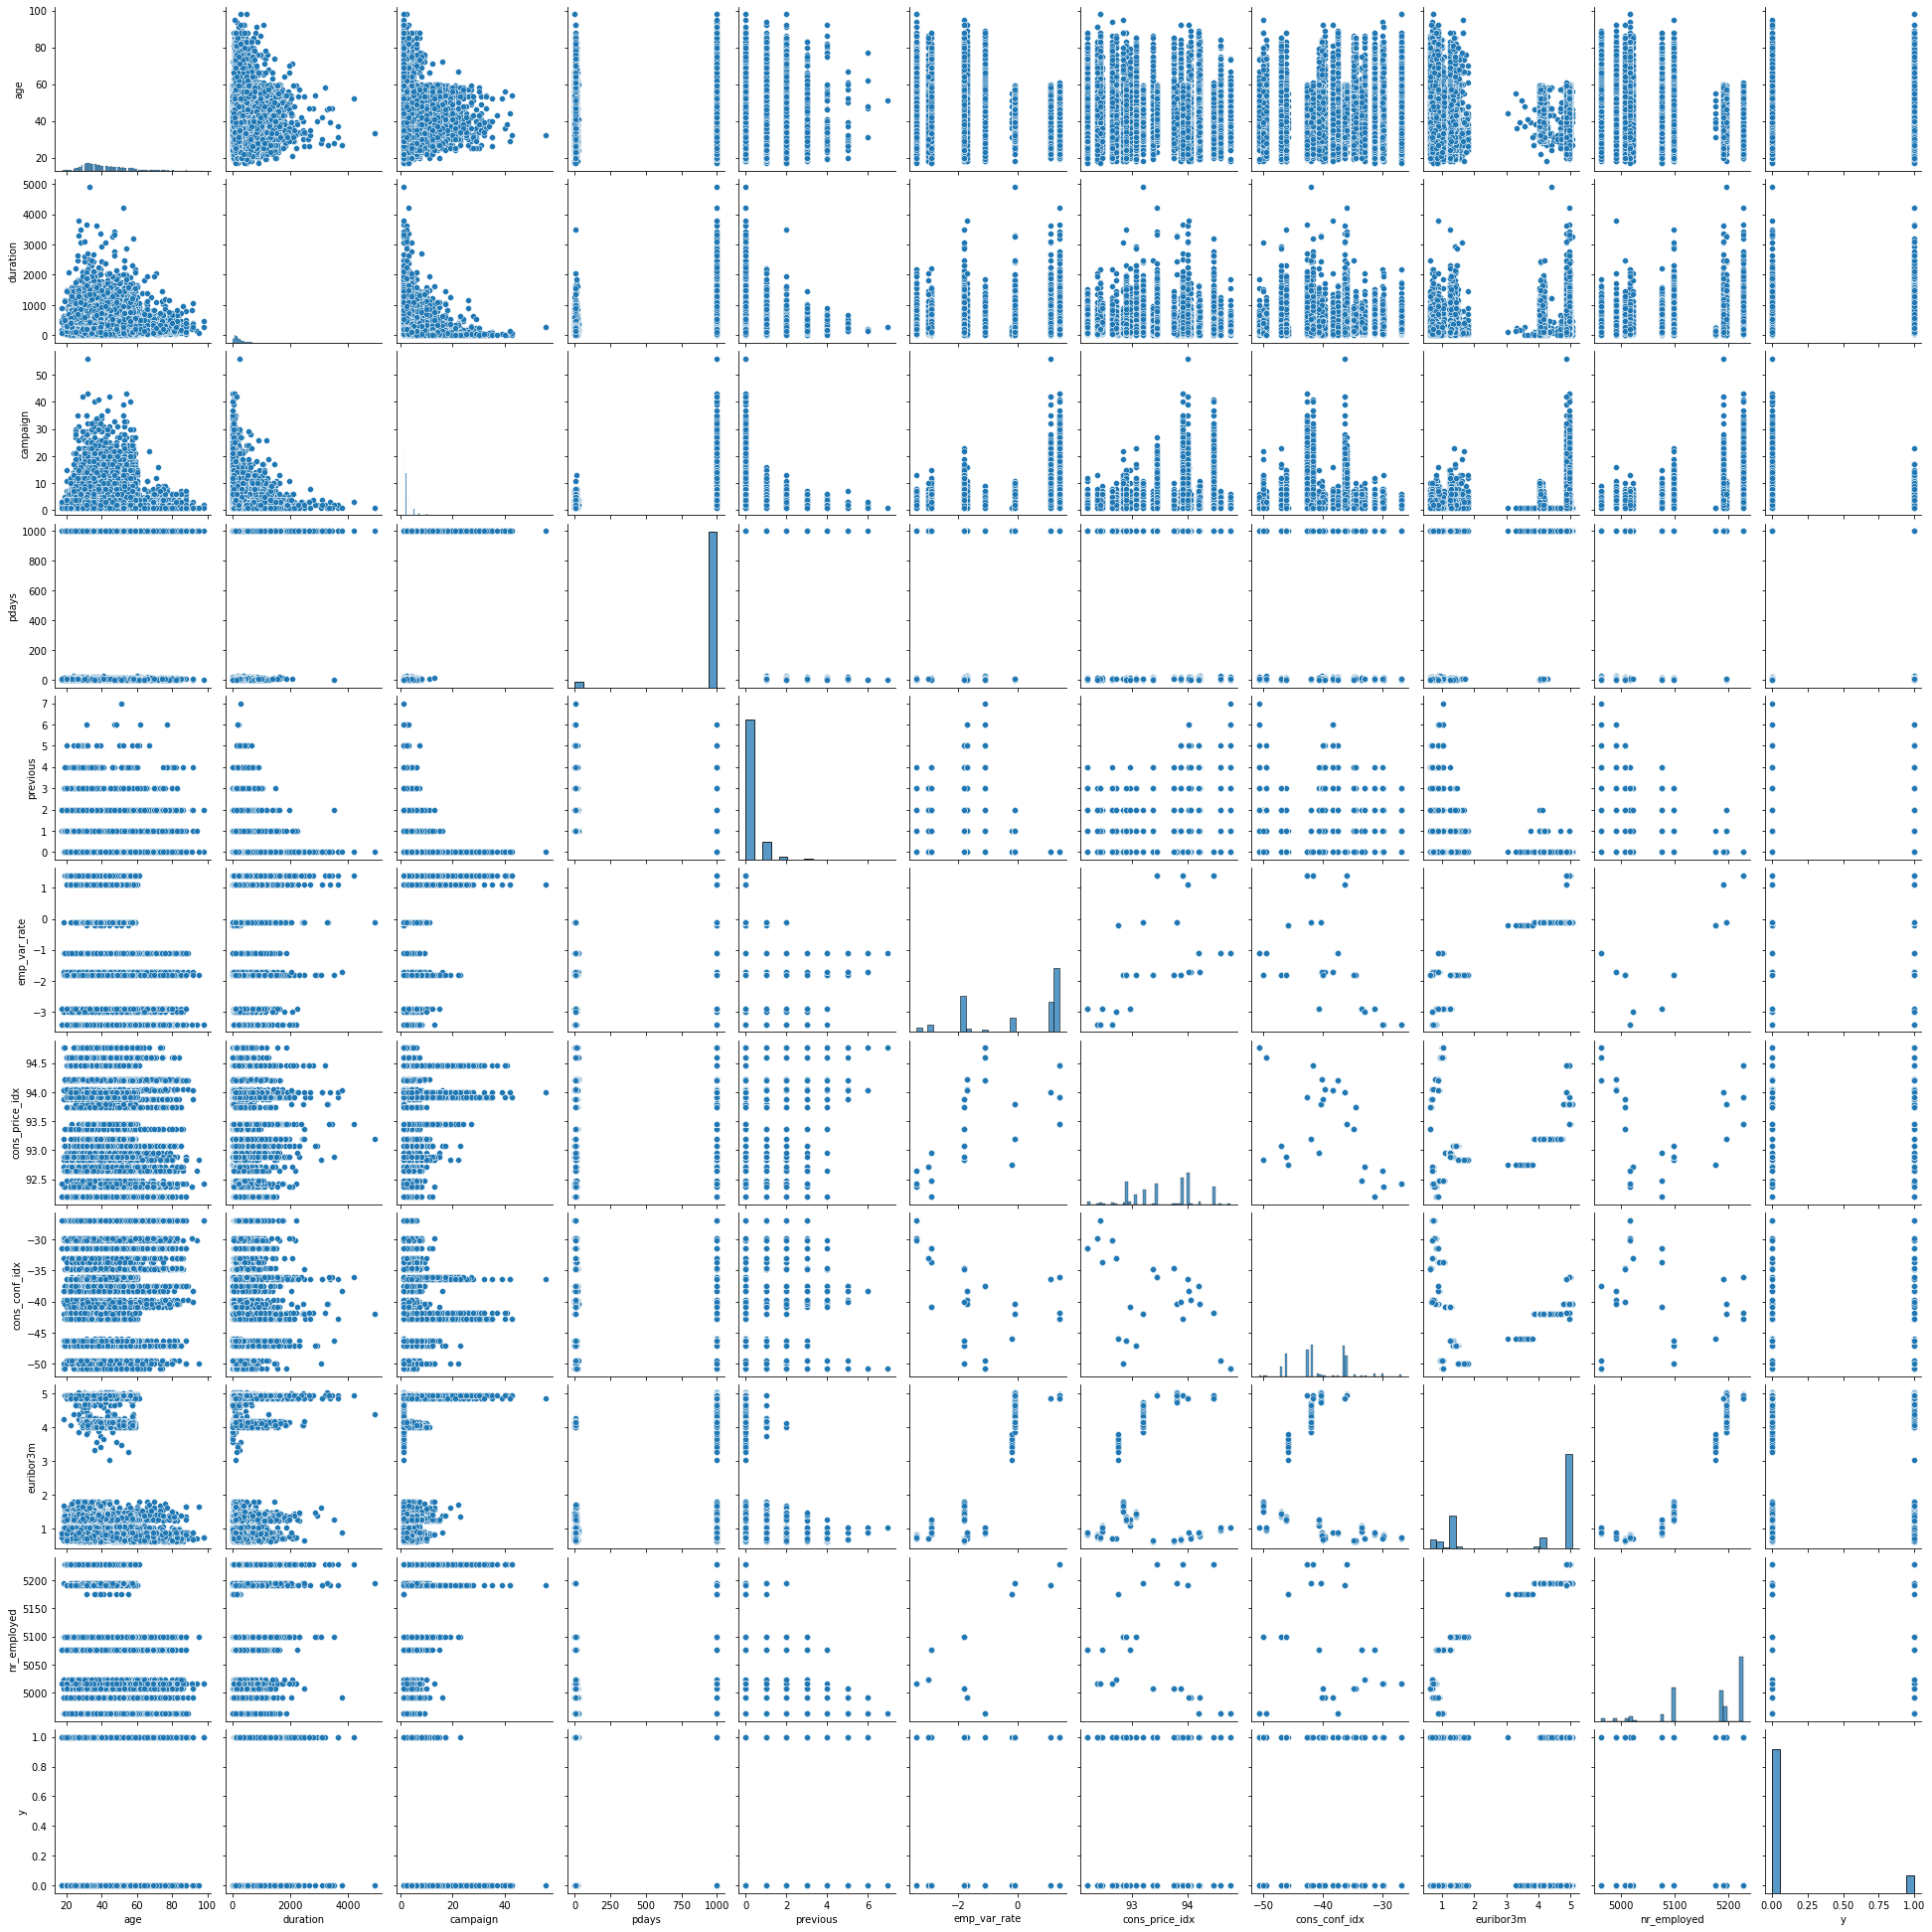

In [127]:
sns.pairplot(df)

### age

<AxesSubplot:xlabel='age', ylabel='Count'>

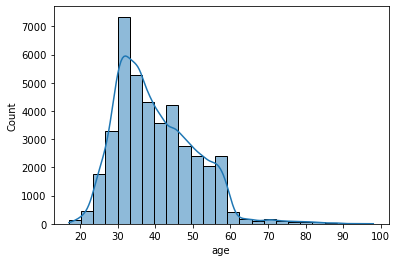

In [128]:
sns.histplot(df['age'], bins=25, kde=True)

<AxesSubplot:xlabel='age'>

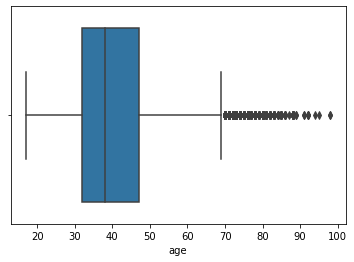

In [129]:
sns.boxplot(df['age'])

### job

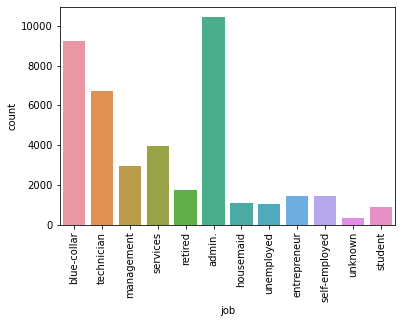

In [130]:
sns.countplot(df['job'])
plt.xticks(rotation=90)
plt.show()

### marital

<AxesSubplot:xlabel='marital', ylabel='count'>

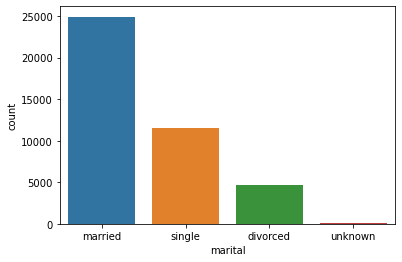

In [131]:
sns.countplot(df['marital'])

### education

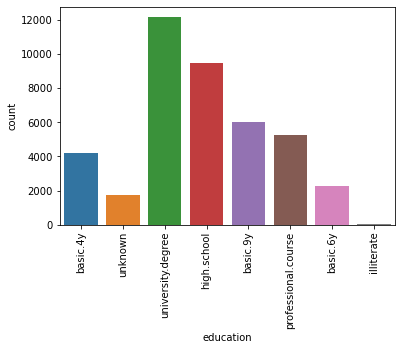

In [132]:
sns.countplot(df['education'])
plt.xticks(rotation=90)
plt.show()

### default

<AxesSubplot:xlabel='default', ylabel='count'>

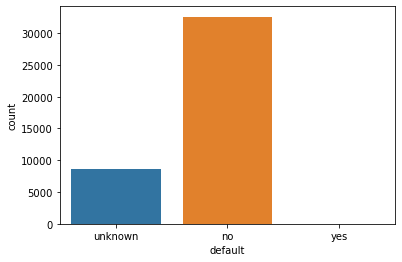

In [133]:
sns.countplot(df['default'])

### housing

<AxesSubplot:xlabel='housing', ylabel='count'>

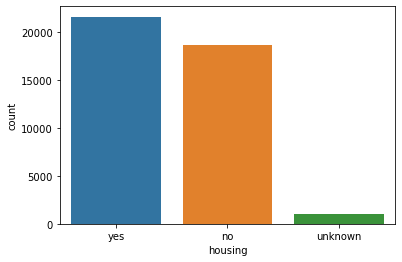

In [134]:
sns.countplot(df['housing'])

### loan

<AxesSubplot:xlabel='loan', ylabel='count'>

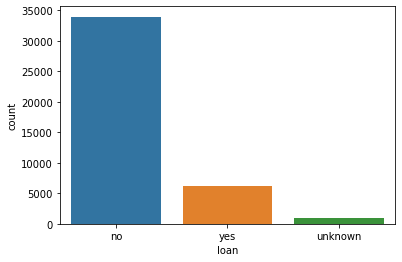

In [135]:
sns.countplot(df['loan'])

### contact

<AxesSubplot:xlabel='contact', ylabel='count'>

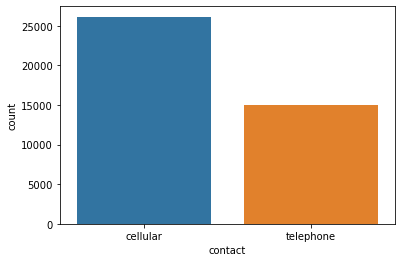

In [136]:
sns.countplot(df['contact'])

### month

<AxesSubplot:xlabel='month', ylabel='count'>

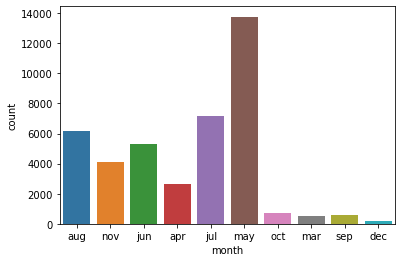

In [137]:
sns.countplot(df['month'])

### day_of_week

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

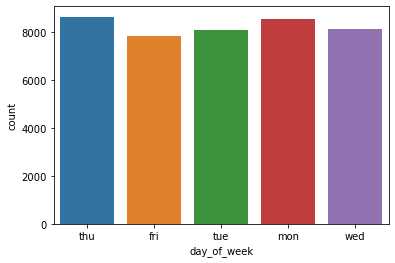

In [138]:
sns.countplot(df['day_of_week'])

### duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

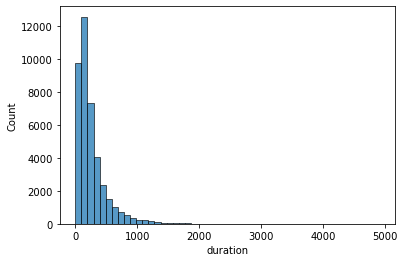

In [139]:
sns.histplot(df['duration'], bins=50)

<AxesSubplot:xlabel='age', ylabel='duration'>

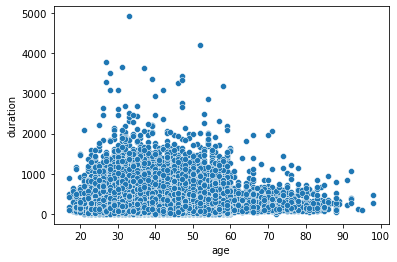

In [140]:
sns.scatterplot(x='age', y='duration', data=df)

<AxesSubplot:xlabel='age', ylabel='duration'>

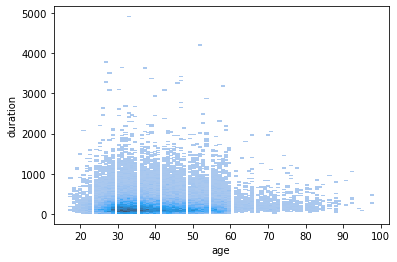

In [141]:
sns.histplot(x='age', y='duration', data=df)

### campaign 

<AxesSubplot:xlabel='campaign', ylabel='Count'>

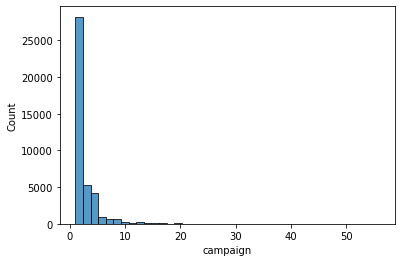

In [142]:
sns.histplot(df['campaign'], bins=40)

<AxesSubplot:xlabel='campaign', ylabel='count'>

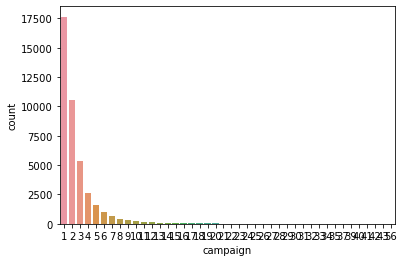

In [143]:
sns.countplot(df['campaign'])

### pdays

<AxesSubplot:xlabel='y', ylabel='pdays'>

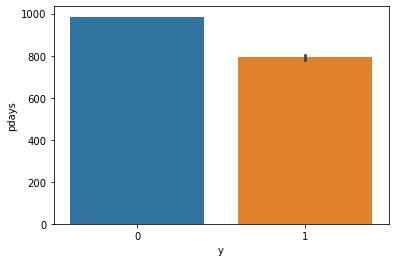

In [144]:
sns.barplot(x='y', y='pdays', data=df)

<AxesSubplot:xlabel='pdays', ylabel='count'>

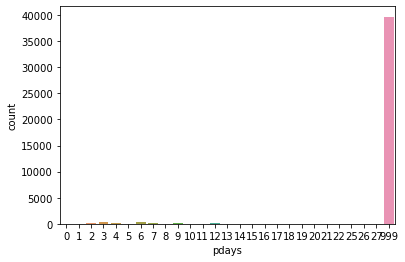

In [145]:
sns.countplot(df['pdays'])

### prevoius

<AxesSubplot:xlabel='previous', ylabel='count'>

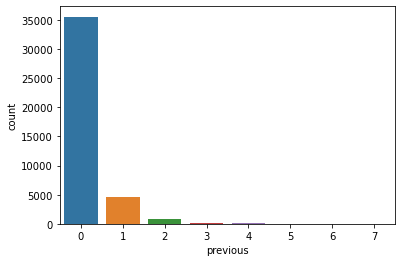

In [146]:
sns.countplot(df['previous'])

### outcome

<AxesSubplot:xlabel='poutcome', ylabel='count'>

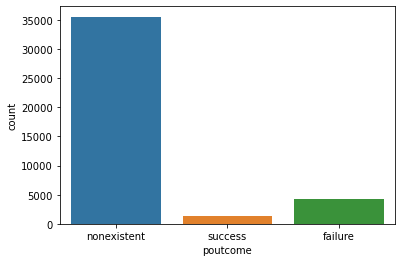

In [147]:
sns.countplot(df['poutcome'])

### emp_var_rate

<AxesSubplot:xlabel='emp_var_rate', ylabel='count'>

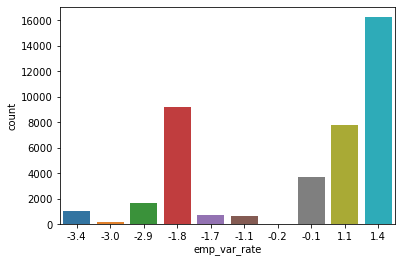

In [148]:
sns.countplot(df['emp_var_rate'])

<AxesSubplot:xlabel='emp_var_rate'>

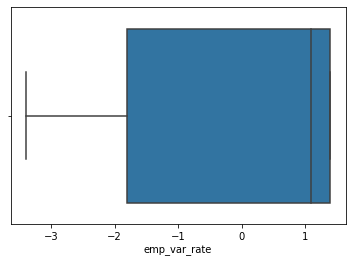

In [149]:
sns.boxplot(df['emp_var_rate'])

### cons_price_idx

<AxesSubplot:xlabel='cons_price_idx', ylabel='Count'>

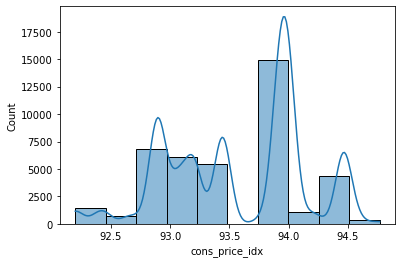

In [150]:
sns.histplot(df['cons_price_idx'], bins=10, kde=True)

<AxesSubplot:xlabel='cons_price_idx', ylabel='count'>

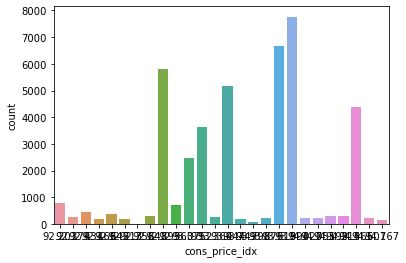

In [151]:
sns.countplot(df['cons_price_idx'])

<AxesSubplot:xlabel='cons_price_idx'>

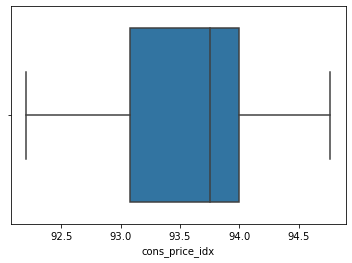

In [152]:
sns.boxplot(df['cons_price_idx'])

### cons_conf_idx

<AxesSubplot:xlabel='cons_conf_idx', ylabel='Count'>

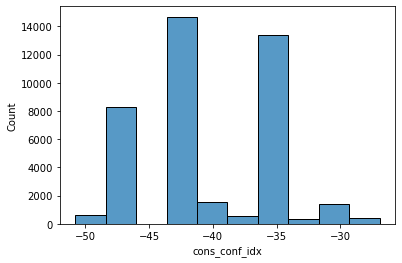

In [153]:
sns.histplot(df['cons_conf_idx'], bins=10)

<AxesSubplot:xlabel='cons_conf_idx', ylabel='count'>

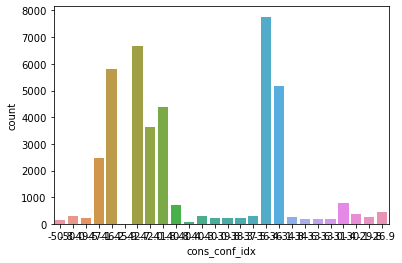

In [154]:
sns.countplot(df['cons_conf_idx'])

<AxesSubplot:xlabel='cons_conf_idx'>

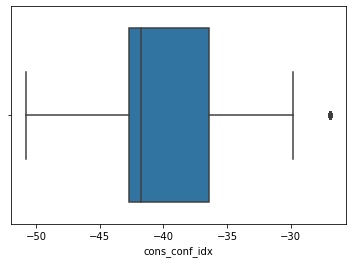

In [155]:
sns.boxplot(df['cons_conf_idx'])

### euribor3m

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

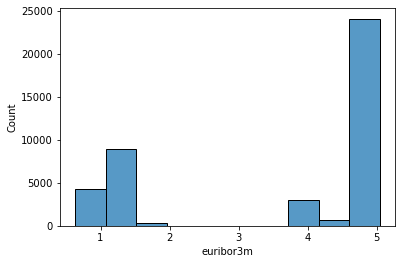

In [156]:
sns.histplot(df['euribor3m'], bins=10)

<AxesSubplot:xlabel='euribor3m'>

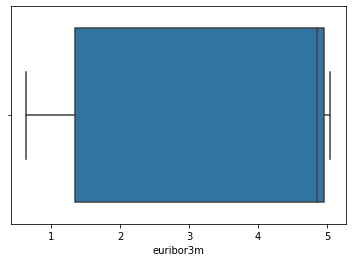

In [157]:
sns.boxplot(df['euribor3m'])

### nr_employed

<AxesSubplot:xlabel='nr_employed', ylabel='count'>

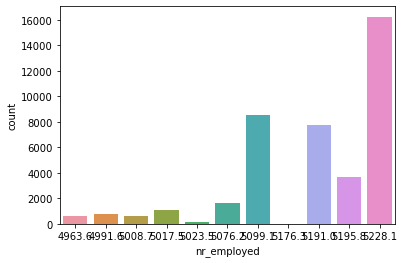

In [158]:
sns.countplot(df['nr_employed'])

<AxesSubplot:xlabel='nr_employed', ylabel='Count'>

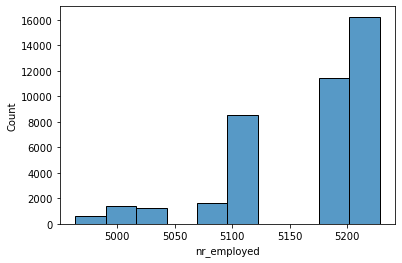

In [159]:
sns.histplot(df['nr_employed'], bins=10)

<AxesSubplot:xlabel='nr_employed'>

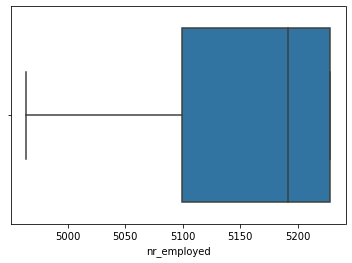

In [160]:
sns.boxplot(df['nr_employed'])

### target 'y'

<AxesSubplot:xlabel='y', ylabel='count'>

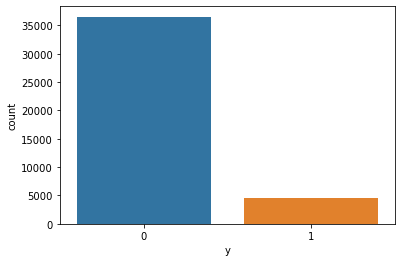

In [161]:
sns.countplot(df['y'])

### Input & Target Variables

In [162]:
input_df = df.drop(columns='y')

In [163]:
target_df = df['y']

In [164]:
target_df

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

## Feature Engineering

## Modeling